In [1]:
import numpy as np
import matplotlib.pyplot as plt
import helper_functions as hf


## Load and sanitize dataframe

In [3]:
df = hf.sanitize_and_anonymize_data(rerun=True)

print(f"{len(df)} entries, of which {np.sum(~df.is_postdoc)} are PhDs and {np.sum(df.is_postdoc)} are postdocs")
df.head(3)


87 entries, of which 68 are PhDs and 19 are postdocs


,nickname,institute,is_postdoc,volleyball,running_sprints,basketball,chess,tennis,football,capture_the_flag,spikeball,beer_pong,ping_pong,fooseball,num_sports,avail_monday,avail_tuesday,avail_thursday,avail_friday,late_entry
0,Pushy Bulldog,MPE,False,True,True,True,False,False,True,True,True,False,True,False,7,True,True,True,True,False
1,Thankful Kakapo,MPE,False,False,True,False,False,False,True,True,True,True,True,True,7,True,True,True,True,False
2,Exemplary Cassowary,MPA,False,True,False,False,False,False,False,True,True,True,False,False,4,True,True,True,True,False


In [6]:
team_dict = {team_key + " " + subteam_key: subteam["nickname"].tolist()
                for team_key, val in hf.SPORTS_EVENTS["volleyball"].sub_teams.items()
                for subteam_key, subteam in val.items()
            }
import pandas as pd


rows = [[team_key] + players for team_key, players in team_dict.items()]
def get_row_color(row_val: str, alpha: float = 0.3) -> str:
    for team in hf.ALL_TEAMS:
        if team.name in row_val:
            rgb = team.rgb_colors
            return f'background-color: rgba({rgb[0]}, {rgb[1]}, {rgb[2]}, {alpha})'
    return "background-color: white"
subteams = pd.DataFrame(rows, columns=["Team"] + [f"Player {i+1}" for i in range(4)])
subteams.style.apply(lambda row: [get_row_color(row["Team"])]*len(row), axis=1)


,Team,Player 1,Player 2,Player 3,Player 4
0,Team 1 A,Mammoth Barnacle,Tame Mink,Grouchy Mole,Fine Oyster
1,Team 1 B,Radiant Booby,Flamboyant Lungfish,Clever Wombat,Trifling Tarpon
2,Team 2 A,Animated Yak,Wide Lionfish,Unwritten Saiga,Alarmed Bird
3,Team 2 B,Exemplary Cassowary,Shameless Pufferfish,Scientific Angelfish,Pushy Bulldog
4,Team 3 A,Trivial Uguisu,Excited Rabbit,Amusing Seal,Clumsy Lizard
5,Team 3 B,Reflecting Pug,Assured Flamingo,Damaged Fly,Indelible Cockroach


In [3]:
best_seed = 34  # hf.find_optimal_team_seed(df, 3, num_tries=150)
print(best_seed)


34


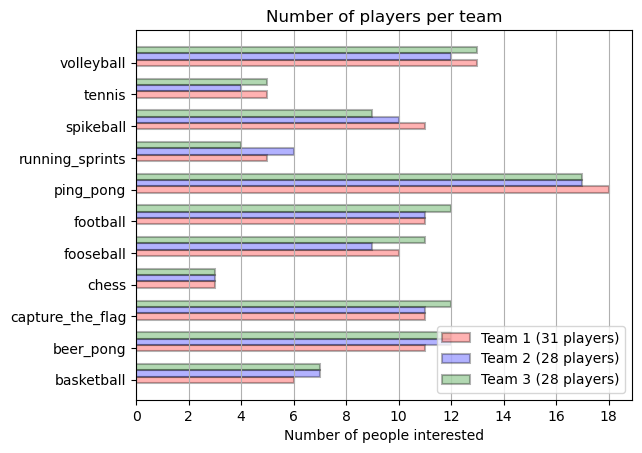

In [4]:
teams = hf.create_teams(df, 3, best_seed, from_backup=False, create_backup=True)
fig, ax = plt.subplots()
for team in teams:
    team.plot_sports_num()
ax.set_title("Number of players per team")
ax.legend()


In [10]:
[name.replace("does_", "") for name in hf.SPORTS_DF["name"].tolist()]


['basketball',
 'beer_pong',
 'capture_the_flag',
 'chess',
 'fooseball',
 'football',
 'ping_pong',
 'running/sprints',
 'spikeball',
 'tennis',
 'volleyball']

In [15]:
for team in teams:
    print(team.get_subteams_for_sport(hf.SPORTS_EVENTS["Volleyball"], 2, 4))


{'A':             nickname   response_timestamp institute  is_postdoc  \
27  Mammoth Barnacle  2024-03-28 18:03:19       MPE       False   
24         Tame Mink  2024-03-12 13:22:02       MPE       False   
4       Grouchy Mole  2024-03-28 19:57:40       IPP       False   
23       Fine Oyster  2024-03-12 18:10:11       ESO       False   

    does_basketball  does_beer_pong  does_capture_the_flag  does_chess  \
27            False           False                  False       False   
24            False           False                  False       False   
4             False           False                   True       False   
23            False            True                  False       False   

    does_fooseball  does_football  does_ping_pong  does_running/sprints  \
27            True          False           False                 False   
24           False          False           False                 False   
4             True          False           False             

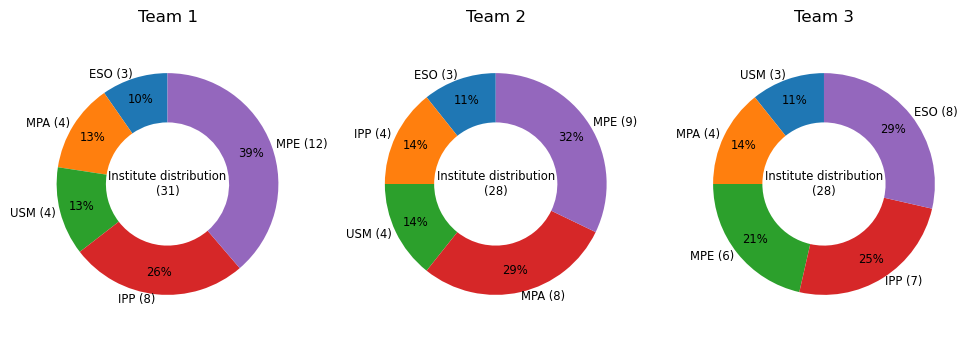

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, team in zip(axes, teams):
    plt.sca(ax)
    hf.create_institute_plot(team.player_df)
    ax.set_title(team.name)


In [7]:
teams[0].get_players_for_sport("does_chess")


,nickname,response_timestamp,institute,is_postdoc,does_basketball,does_beer_pong,does_capture_the_flag,does_chess,does_fooseball,does_football,does_ping_pong,does_running/sprints,does_spikeball,does_tennis,does_volleyball,num_sports,avail_monday,avail_tuesday,avail_thursday,avail_friday
55,Clever Wombat,2024-03-26 22:33:02,IPP,False,False,False,False,True,False,False,True,False,False,False,True,3,True,True,False,True
61,Trifling Tarpon,2024-03-27 09:20:14,IPP,False,False,False,False,True,False,True,True,False,False,False,True,4,True,True,True,True
75,Awkward Cichlid,2024-03-12 20:12:02,USM,False,False,False,False,True,False,True,True,False,True,False,False,4,True,True,True,True


## Make some plots

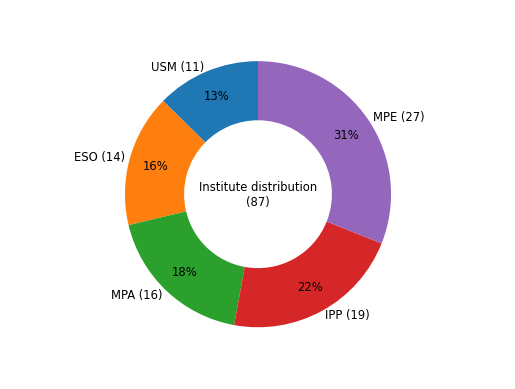

In [148]:
# Distribution of institutes
hf.create_institute_plot(df)


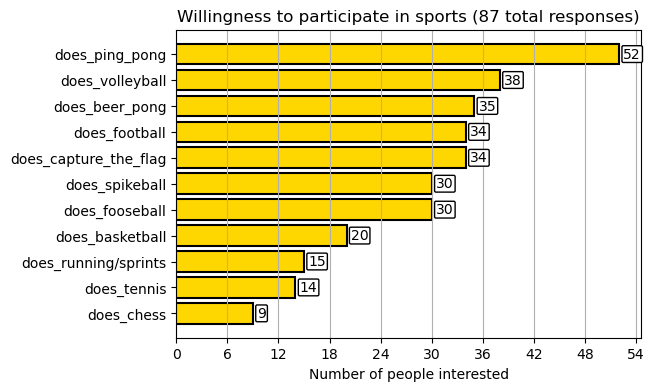

In [10]:
# Overall distribution of sports
fig, ax = plt.subplots(figsize=(6, 4))
hf.create_sports_num_plot(df, annotate_numbers=True, sort_bars=True)
